# Tathagata Mookherjee<br>
ROLL NUMBER - M21AI619<br>
CSL7590 Deep Learning, Assignment 3<br>
IIT JODHPUR<br>

1. Implement the Sparse auto-encoders (AE). Use the MNIST digit dataset for training your network. Perform the k-means clustering on the embeddings. To evaluate the performance of the k-means algorithm, use the available labels in the dataset.<br>
Dataset: http://yann.lecun.com/exdb/mnist/<br>
[15 Marks]<br>

In [13]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn import metrics
from keras.datasets import mnist
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

load the mnist data from keras datasests

In [14]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_cord = np.concatenate((x_train, x_test))
y_cord = np.concatenate((y_train, y_test))
x_cord = x_cord.reshape((x_cord.shape[0], -1))/255

load and run the pretrained model on the data

In [15]:
new_model = tf.keras.models.load_model("SAEModel")
new_model.evaluate(x_cord, x_cord, verbose = 1)
decoded_img = new_model.predict(x_cord)

2188/2188 [==============================] - 4s 2ms/step - loss: 0.0258


plotting some of the original and decoded images

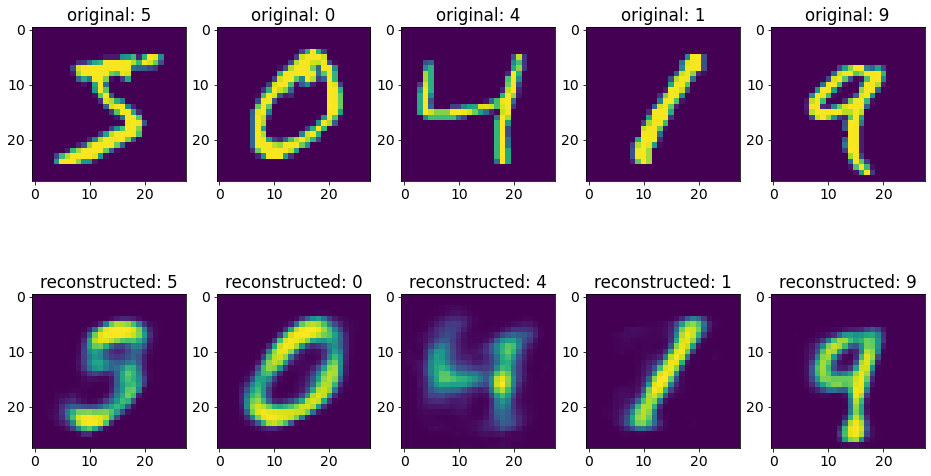

In [16]:
n = 5
plt.figure(figsize=(16, 9))
X_test_back = x_cord.reshape(70000, 28, 28)
reconstructed = decoded_img.reshape(70000, 28, 28)

for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(X_test_back[i])
  plt.title("original: " + str(y_cord[i]))
  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(reconstructed[i])
  plt.title("reconstructed: " + str(y_cord[i]))
plt.show()

some functions that will be used later

In [17]:
def infer_cluster_labels(kmeans, actual_labels):
    inferred_labels = {}
    for i in range(kmeans.n_clusters):
        labels = []
        index = np.where(kmeans.labels_ == i)
        labels.append(actual_labels[index])
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))
        if np.argmax(counts) in inferred_labels:
            inferred_labels[np.argmax(counts)].append(i)
        else:
            inferred_labels[np.argmax(counts)] = [i]
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key   
    return predicted_labels

evaluate the performance of the k-means algorithm per cluster count

In [18]:
accuracy_list = []
counter_list = []
cluster_counter=25
accuracy=0
while accuracy<.8:
  regen_kmeans = KMeans(n_clusters= cluster_counter)
  regen_kmeans.fit(decoded_img)
  cluster_labels = infer_cluster_labels(regen_kmeans, y_cord)
  predicted_labels = infer_data_labels(regen_kmeans.labels_, cluster_labels)

  accuracy = metrics.accuracy_score(y_cord, predicted_labels)
  accuracy_list.append(accuracy)
  counter_list.append(cluster_counter)
  print("using cluster count: ", cluster_counter, ' accuracy: ', accuracy)
  cluster_counter+=5

using cluster count:  25  accuracy:  0.7116
using cluster count:  30  accuracy:  0.7286714285714285
using cluster count:  35  accuracy:  0.7403142857142857
using cluster count:  40  accuracy:  0.7604285714285715
using cluster count:  45  accuracy:  0.7680857142857143
using cluster count:  50  accuracy:  0.7759571428571429
using cluster count:  55  accuracy:  0.7854285714285715
using cluster count:  60  accuracy:  0.7918285714285714
using cluster count:  65  accuracy:  0.7962857142857143
using cluster count:  70  accuracy:  0.8102285714285714


plotting the accuracy

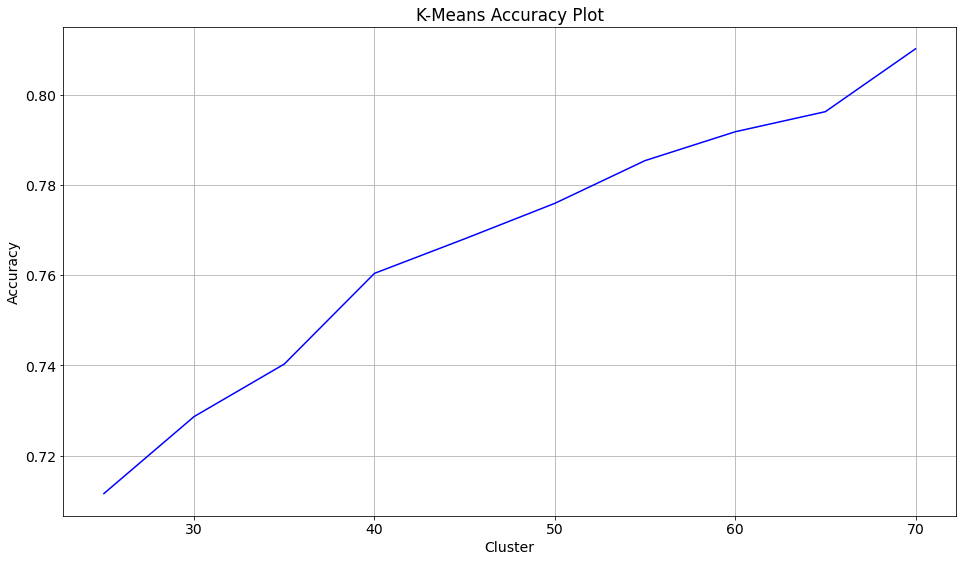

In [21]:
plt.figure(figsize = (16, 9))
plt.rcParams.update({'font.size': 14})
plt.title('K-Means Accuracy Plot')
plt.plot(counter_list,accuracy_list, c='b')
plt.xlabel("Cluster")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show() 